## Observations and Insights 

In [198]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = mouse_metadata.merge(study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [199]:
# Checking the number of mice.
combined_df['Mouse ID'].value_counts().sum()

1893

In [200]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'])]

In [201]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate = combined_df[combined_df.duplicated()]

In [202]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(['Mouse ID'])

In [204]:
# Checking the number of mice in the clean DataFrame.
clean_df = combined_df.drop_duplicates(['Mouse ID']).value_counts().sum()
clean_df

249

## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_var = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary data

stats_summary_df = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median, 
                                 "Variance": tumor_var, "Std": tumor_std,
                                 "SEM": tumor_sem})
stats_summary_df


,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [205]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stats_summary_df1 = combined_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
stats_summary_df1

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

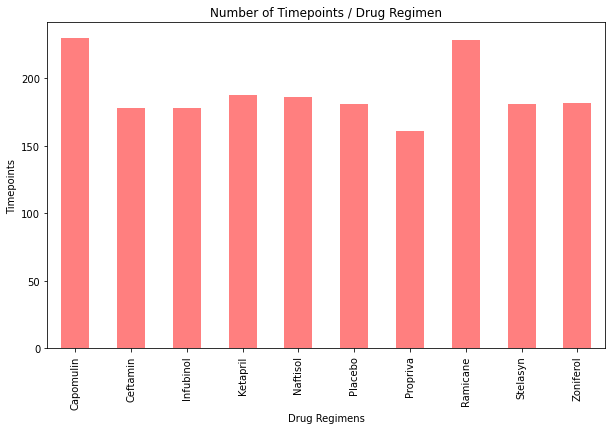

In [206]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_count = combined_df.groupby(['Drug Regimen'])['Mouse ID'].count()
timepoint_count.plot(kind="bar", figsize=(10,6), color='r', alpha=0.5, align="center")
plt.title("Number of Timepoints / Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Timepoints")
plt.show()

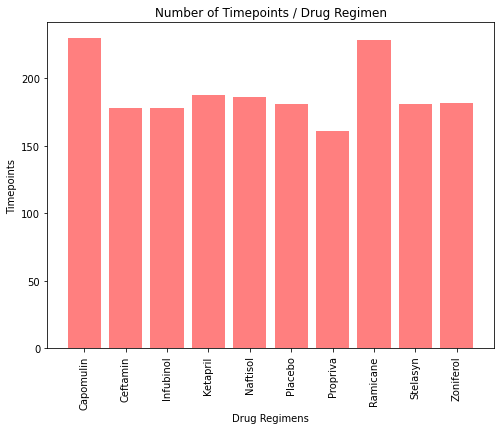

In [207]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
user = list(timepoint_count)
x_axis = np.arange(len(user))
x_axis_names = list(combined_df['Drug Regimen'].unique())

plt.bar(x_axis,user, color='r', alpha=0.5, align="center")

tick_locations = x_axis
tick_labels = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane',
              'Stelasyn','Zoniferol']
plt.xticks(tick_locations, tick_labels)
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=90)
plt.title("Number of Timepoints / Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Timepoints")
plt.show()


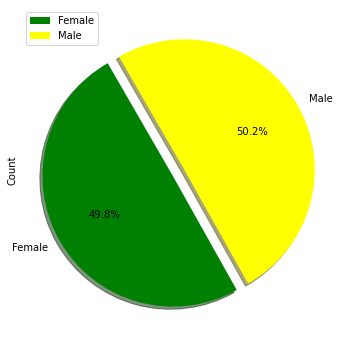

In [283]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = combined_df.groupby(['Sex','Mouse ID']).size()

gender_count = gender_df.groupby(['Sex']).count()
percentage = round(100 * gender_count / gender_count.sum(),2)

gender_df = pd.DataFrame({"Count": gender_count, "Percentage": percentage})
colors = ['green', 'yellow']
explode = (0.1, 0)
gender_pieplot_pandas = gender_df.plot.pie(y='Count',figsize=(6,6), colors = colors,
                                           startangle=120, explode = explode, shadow = True, autopct="%1.1f%%")

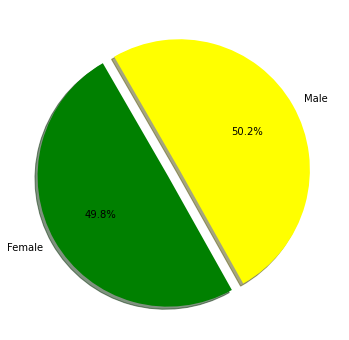

In [284]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
colors = ['green', 'yellow']
explode = (0.1, 0)

plt.pie(percentage, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)

plt.show()

## Quartiles, Outliers and Boxplots

In [430]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin", :]

#Capomulin
# Start by getting the last (greatest) timepoint for each mouse
cap_last = capomulin_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_merge = pd.merge(cap_last, combined_df, on=("Mouse ID","Timepoint"),how="left")

quartiles = cap_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)
median = round(quartiles[0.5],2)
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
outlier_capomulin = cap_merge.loc[(cap_merge['Tumor Volume (mm3)'] < lower_bound) | (cap_merge['Tumor Volume (mm3)'] > upper_bound)]
outliers_cap = outlier_capomulin.size
total_qty_cap = cap_merge['Tumor Volume (mm3)'].size

print(f"The lower quartile of Capomulin tumor volume is: {lowerq}")
print(f"The upper quartile of Capomulin tumor volume is: {upperq}")
print(f"The interquartile range of Capomulin tumor volume is: {iqr}")
print(f"The median of Capomulin tumor volume is: {median} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"Total outliers found: {outliers_cap} out of {total_qty_cap} ")

#Ramicane
# Start by getting the last (greatest) timepoint for each mouse
ram_last = ramicane_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ram_merge = pd.merge(ram_last, combined_df, on=("Mouse ID","Timepoint"),how="left")

quartiles = ram_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)
median = round(quartiles[0.5],2)
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
outlier_ramicane = ram_merge.loc[(ram_merge['Tumor Volume (mm3)'] < lower_bound) | (ram_merge['Tumor Volume (mm3)'] > upper_bound)]
outliers_ram = outlier_ramicane.size
total_qty_ram = ram_merge['Tumor Volume (mm3)'].size
print('----------------------------------------------------------')
print(f"The lower quartile of Ramicane tumor volume is: {lowerq}")
print(f"The upper quartile of Ramicane tumor volume is: {upperq}")
print(f"The interquartile range of Ramicane tumor volume is: {iqr}")
print(f"The median of Ramicane tumor volume is: {median} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"Total outliers found: {outliers_ram} out of {total_qty_ram} ")

#Infubinol
# Start by getting the last (greatest) timepoint for each mouse
inf_last = infubinol_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
inf_merge = pd.merge(inf_last, combined_df, on=("Mouse ID","Timepoint"),how="left")

quartiles = inf_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)
median = round(quartiles[0.5],2)
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
outlier_infubinol = inf_merge.loc[(inf_merge['Tumor Volume (mm3)'] < lower_bound) | (inf_merge['Tumor Volume (mm3)'] > upper_bound)]
outliers_inf = outlier_infubinol.size
total_qty_inf = inf_merge['Tumor Volume (mm3)'].size
print('----------------------------------------------------------')
print(f"The lower quartile of Infubinol tumor volume is: {lowerq}")
print(f"The upper quartile of Infubinol tumor volume is: {upperq}")
print(f"The interquartile range of Infubinol tumor volume is: {iqr}")
print(f"The median of Infubinol tumor volume is: {median} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"Total outliers found: {outliers_ram} out of {total_qty_ram} ")

#Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
cef_last = ceftamin_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cef_merge = pd.merge(cef_last, combined_df, on=("Mouse ID","Timepoint"),how="left")

quartiles = cef_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)
median = round(quartiles[0.5],2)
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
outlier_ceftamin = cef_merge.loc[(cef_merge['Tumor Volume (mm3)'] < lower_bound) | (cef_merge['Tumor Volume (mm3)'] > upper_bound)]
outliers_cef = outlier_ceftamin.size
total_qty_cef = cef_merge['Tumor Volume (mm3)'].size
print('----------------------------------------------------------')
print(f"The lower quartile of Ceftamin tumor volume is: {lowerq}")
print(f"The upper quartile of Ceftamin tumor volume is: {upperq}")
print(f"The interquartile range of Ceftamin tumor volume is: {iqr}")
print(f"The median of Ceftamin tumor volume is: {median} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"Total outliers found: {outliers_cef} out of {total_qty_cef} ")

The lower quartile of Capomulin tumor volume is: 32.38
The upper quartile of Capomulin tumor volume is: 40.16
The interquartile range of Capomulin tumor volume is: 7.78
The median of Capomulin tumor volume is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
Total outliers found: 0 out of 25 
----------------------------------------------------------
The lower quartile of Ramicane tumor volume is: 31.56
The upper quartile of Ramicane tumor volume is: 40.66
The interquartile range of Ramicane tumor volume is: 9.1
The median of Ramicane tumor volume is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Total outliers found: 0 out of 25 
----------------------------------------------------------
The lower quartile of Infubinol tumor volume is: 54.05
The upper quartile of Infubinol tumor volume is: 65.53
The interquartile range of Infubinol tumor volume is: 11.48
The median of Infubinol tumor volume is: 60.17 
Values below 

In [359]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

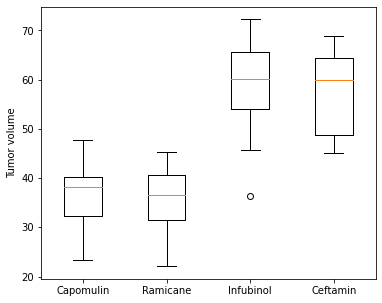

In [415]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
selected_regimens= combined_df[combined_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
selected_regimen_data = selected_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
last_timepoint_df = selected_regimen_data.sort_values('Timepoint').groupby('Mouse ID').tail(1)
tumor_list = pd.DataFrame(last_timepoint_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list))
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
tumor_list = tumor_list.reindex(treatments)
tumor_volumes = [v for v in tumor_list['Tumor Volume (mm3)']]

plt.figure(figsize=(6,5))
plt.ylabel('Tumor volume')
plt.boxplot(tumor_volumes, labels=treatments)
plt.show()


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
